Text(0, 0.5, 'Feature 1')

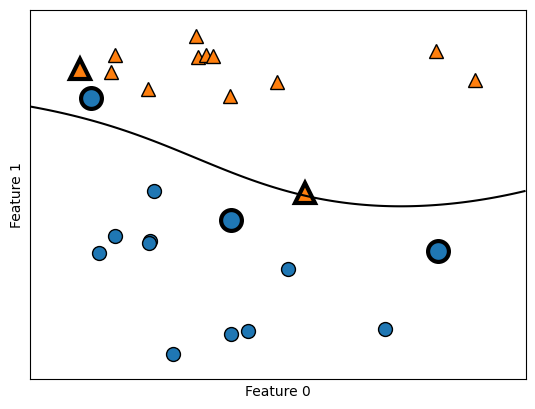

In [5]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns
import mglearn

from sklearn.svm import SVC

X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf',C=10,gamma= 0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")



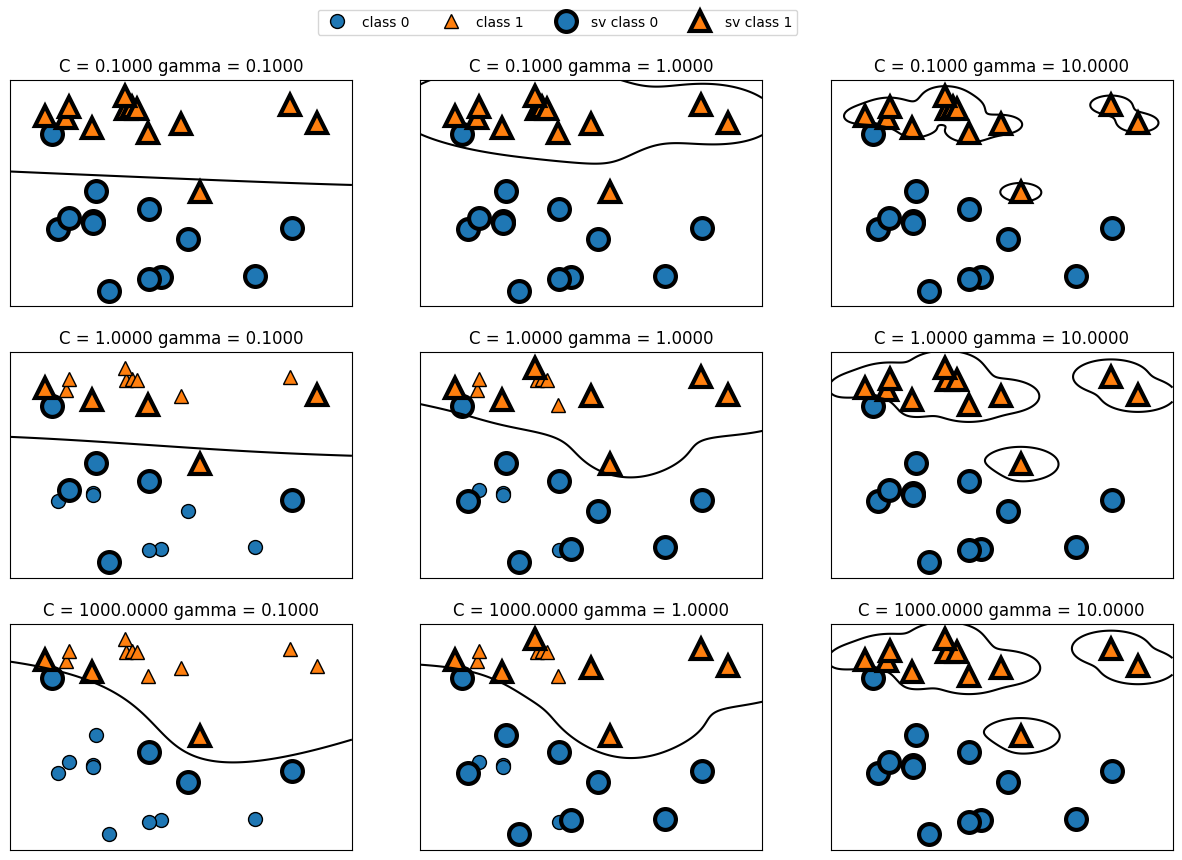

In [7]:
fig, axes = plt.subplots(3,3,figsize=(15,10))
for ax,C in zip(axes,[-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)
axes[0,0].legend(["class 0","class 1","sv class 0","sv class 1"],ncol= 4,loc=(.9,1.2))

preproccesing data for svms and why it is important


In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
svc = SVC()
svc.fit(X_train,y_train)
print(f"Training set score {svc.score(X_train,y_train)}")
print(f"Test set score {svc.score(X_test,y_test)}")

Training set score 0.903755868544601
Test set score 0.9370629370629371


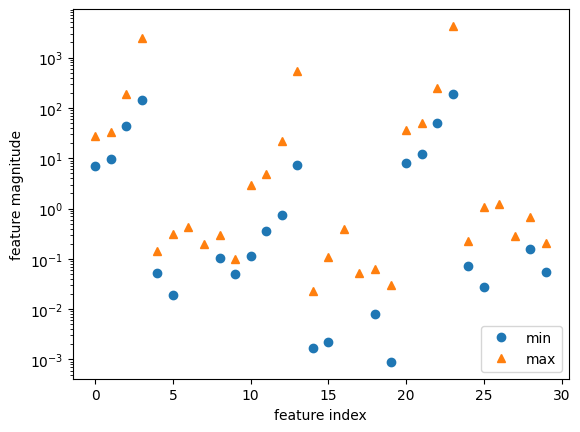

In [9]:
plt.plot(X_train.min(axis=0),'o',label='min')
plt.plot(X_train.max(axis=0),'^',label='max')
plt.legend(loc=4)
plt.xlabel("feature index")
plt.ylabel("feature magnitude")
plt.yscale("log")

In [11]:
min_on_train = X_train.min(axis=0)
range_on_train = (X_train - min_on_train).max(axis=0)
X_train_scaled = (X_train - min_on_train)/range_on_train
print(f"min for each feature {X_train_scaled.min(axis=0)}")
print(f"max of each feature {X_train_scaled.max(axis=0)}")

X_test_scaled = (X_test- min_on_train)/range_on_train

svc = SVC()
svc.fit(X_train_scaled,y_train)

print(f"training score {svc.score(X_train_scaled,y_train)}")
print(f"test set score {svc.score(X_test_scaled,y_test)}")

min for each feature [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
max of each feature [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
training score 0.9835680751173709
test set score 0.972027972027972
